In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from math import ceil
%matplotlib inline
data1 = pd.read_csv("Oakland-Crime-Statistics/records-for-2011.csv",encoding="utf-8")
data2 = pd.read_csv("Oakland-Crime-Statistics/records-for-2012.csv",encoding="utf-8")
data3 = pd.read_csv("Oakland-Crime-Statistics/records-for-2013.csv",encoding="utf-8")
data4 = pd.read_csv("Oakland-Crime-Statistics/records-for-2014.csv",encoding="utf-8")
data5 = pd.read_csv("Oakland-Crime-Statistics/records-for-2015.csv",encoding="utf-8")
data6 = pd.read_csv("Oakland-Crime-Statistics/records-for-2016.csv",encoding="utf-8")
data_all=[data1,data2,data3,data4,data5,data6]

#df.drop([len(df)-1],inplace=True)
print("几年数据库属性一样，12和14的多了个zip code属性未填充值")
print("标称属性为:Location,Area id,Incident Type id，Incident Type Descripe,EventNumber")
print("由于这个犯罪数据库并没有严格意义上的数值属性，因此无法对于数值属性进行五数概括，但可以进行一些其他有趣的统计")

几年数据库属性一样，12和14的多了个zip code属性未填充值
标称属性为:Location,Area id,Incident Type id，Incident Type Descripe,EventNumber
由于这个犯罪数据库并没有严格意义上的数值属性，因此无法对于数值属性进行五数概括，但可以进行一些其他有趣的统计


可以看到每年的案件优先级2数量都比优先级1要多3倍以上


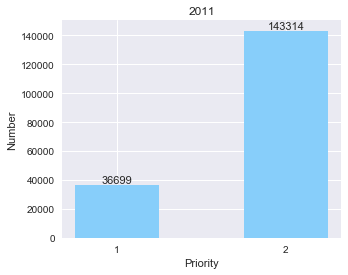

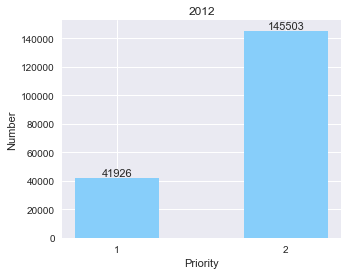

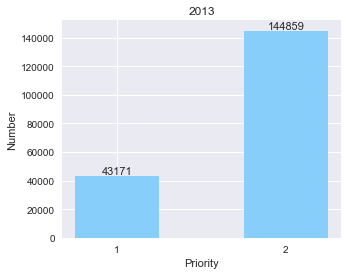

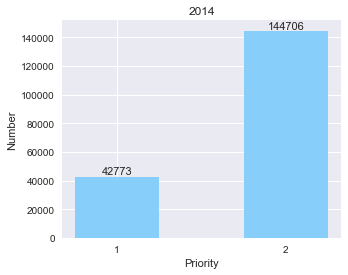

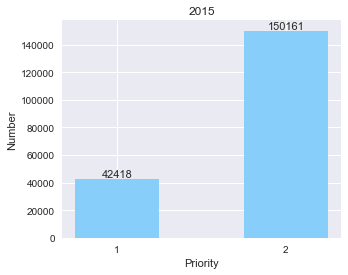

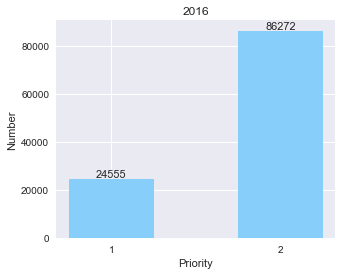

In [4]:
#每一年案件优先级别1:生命危险 2:一般危险统计
data_all1=data_all
year=2011
count=0
for data in data_all1:
    data.drop([len(data)-1],inplace=True)
    data_priority=data["Priority"]
    priority1=data_priority.loc[data_priority.isin([1])]
    priority2=data_priority.loc[data_priority.isin([2])]
    index=[1,2]
    values=[priority1.sum(),priority2.sum()/2]

    plt.figure(figsize=(5,4))
  
    plt.bar(index,values, 0.5, label="num", color="#87CEFA")
    plt.xticks(index)
    for a,b in zip(index,values):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Priority")  #设置X轴Y轴名称  
    plt.ylabel("Number")  
    plt.title(year)
    year=year+1
print("可以看到每年的案件优先级2数量都比优先级1要多3倍以上")

从这几年的案发立案时间可以看出案情多在12-24点发生


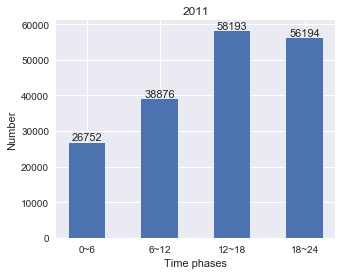

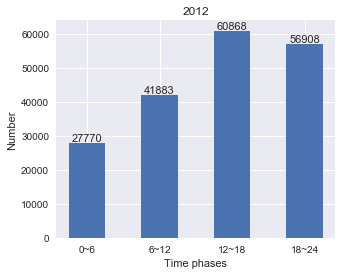

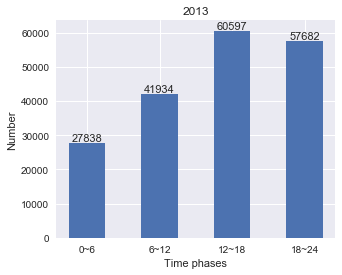

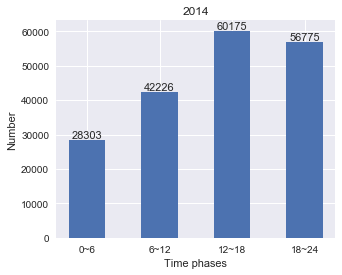

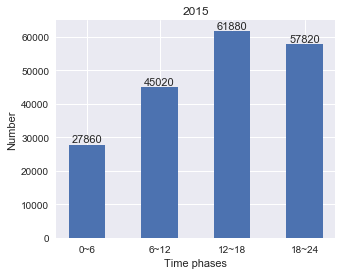

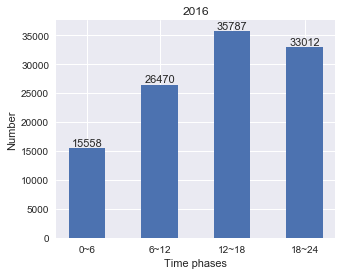

In [5]:
#分时间段统计,第二个数据库还有一行187255全空，奇坑无比
year=2011

for data in data_all:
    data_time=data["Create Time"]
    data_time=data_time.dropna(axis=0,how='all')  
    data_time=data_time.values
    time=[]
    for i in range(len(data_time)):
        time.append(int(data_time[i][11:13]))
    time0_24=np.zeros(4)
    index = np.arange(4)
    for i in range(len(time)):
        if(time[i]>=0 and time[i]<6):
            time0_24[0]+=1
        if(time[i]>=6 and time[i]<12):
            time0_24[1]+=1
        if(time[i]>=12 and time[i]<18):
            time0_24[2]+=1
        if(time[i]>=18 and time[i]<24):
            time0_24[3]+=1
    plt.figure(figsize=(5,4))
    plt.bar(index,time0_24, 0.5, label="num")
    plt.xticks(index,('0~6','6~12','12~18','18~24'))
    for a,b in zip(index,time0_24):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Time phases")  #设置X轴Y轴名称  
    plt.ylabel("Number")  
    plt.title(year)
    year=year+1
print("从这几年的案发立案时间可以看出案情多在12-24点发生")


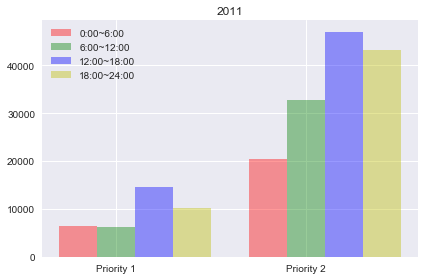

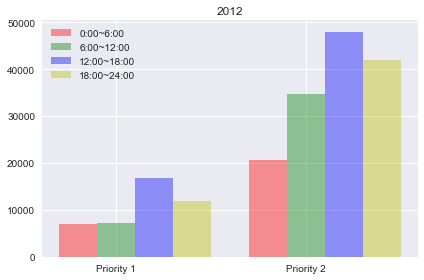

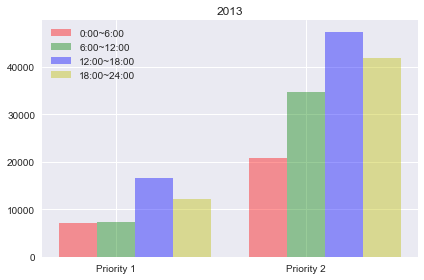

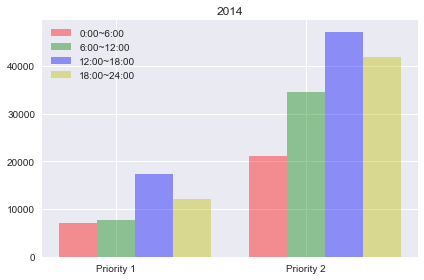

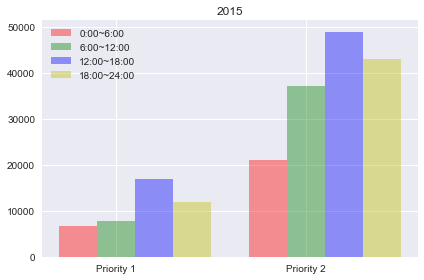

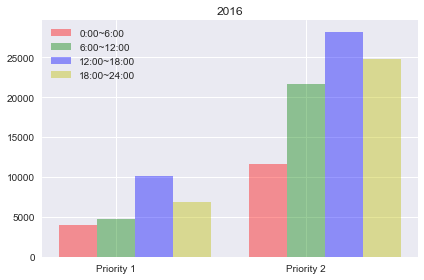

可以看出无论优先级1,2，其案件创建时间数量都是12~18 > 18~24 > 6~12 > 0~6，趋势是一样的，案件的高发期都在午后和夜间


In [6]:
#结合优先级Priority来分析
year=2011

for data in data_all:
    data_g=data[["Create Time","Priority"]]
    data_g=data_g.dropna(axis=0,how='all')  
    data_g1=data_g[data_g["Priority"].isin([1])]
    data_g2=data_g[data_g["Priority"].isin([2])]
   
    data_g1=data_g1["Create Time"].values
    data_g2=data_g2["Create Time"].values
    
    time1=[]
    time2=[]
    for i in range(len(data_g1)):
        time1.append(int(data_g1[i][11:13]))
    for i in range(len(data_g2)):
        time2.append(int(data_g2[i][11:13]))
    
    time1_0_24=np.zeros(4)
    time2_0_24=np.zeros(4)
    index1 = np.arange(4)
    index1 = np.arange(4)
    
    for i in range(len(time1)):
        if(time1[i]>=0 and time1[i]<6):
            time1_0_24[0]+=1
        if(time1[i]>=6 and time1[i]<12):
            time1_0_24[1]+=1
        if(time[i]>=12 and time1[i]<18):
            time1_0_24[2]+=1
        if(time[i]>=18 and time[i]<24):
            time1_0_24[3]+=1
    for i in range(len(time2)):
        if(time2[i]>=0 and time2[i]<6):
            time2_0_24[0]+=1
        if(time2[i]>=6 and time2[i]<12):
            time2_0_24[1]+=1
        if(time2[i]>=12 and time2[i]<18):
            time2_0_24[2]+=1
        if(time2[i]>=18 and time2[i]<24):
            time2_0_24[3]+=1
            
    time1=[time1_0_24[0],time2_0_24[0]]
    time2=[time1_0_24[1],time2_0_24[1]]
    time3=[time1_0_24[2],time2_0_24[2]]
    time4=[time1_0_24[3],time2_0_24[3]]
    
    fig, ax = plt.subplots()
    n_groups=2
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    
    rects1 = ax.bar(index, time1, bar_width,alpha=opacity, color='r',error_kw=error_config,label='0:00~6:00')
    rects2 = ax.bar(index+ bar_width, time2, bar_width,alpha=opacity, color='g',error_kw=error_config,label='6:00~12:00')
    rects3 = ax.bar(index+ bar_width+ bar_width, time3, bar_width,alpha=opacity, color='b',error_kw=error_config,label='12:00~18:00')
    rects4 = ax.bar(index+ bar_width+ bar_width+ bar_width, time4, bar_width,alpha=opacity, color='y',error_kw=error_config,label='18:00~24:00')
    
    ax.set_xticks(index + 3 * bar_width / 3)
    ax.set_xticklabels(('Priority 1', 'Priority 2'))
    ax.legend()    
    plt.title(year)
    fig.tight_layout()
    plt.show()
    year=year+1

print("可以看出无论优先级1,2，其案件创建时间数量都是12~18 > 18~24 > 6~12 > 0~6，趋势是一样的，案件的高发期都在午后和夜间")

无论是优先级1还是2，每年主要的犯罪类型所占比重基本不变，即Top10中各种犯罪类型占比稳定，不存在一种犯罪类型突然暴增或彻底消失的情况
2011:的犯罪记录情况如下


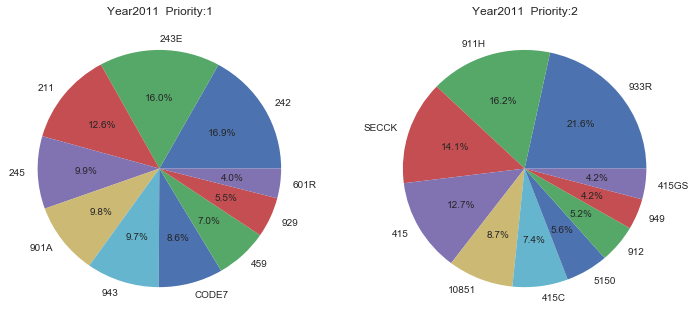

2012:的犯罪记录情况如下


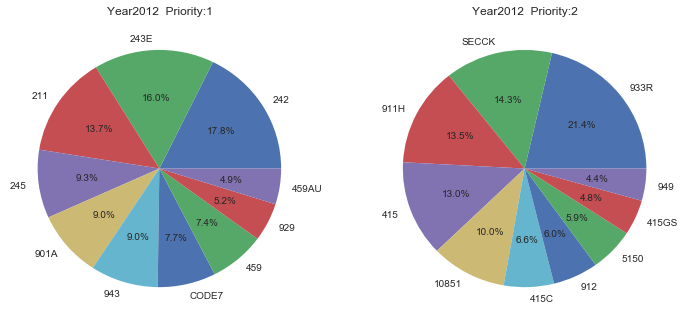

2013:的犯罪记录情况如下


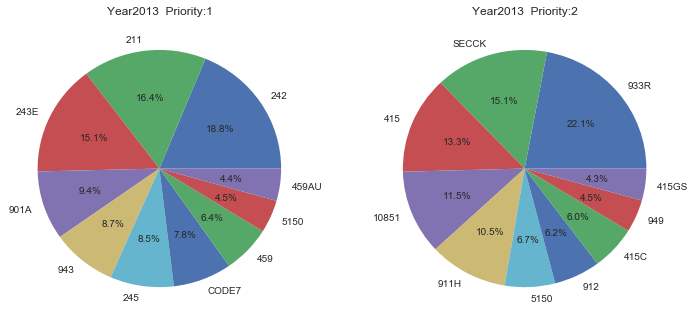

2014:的犯罪记录情况如下


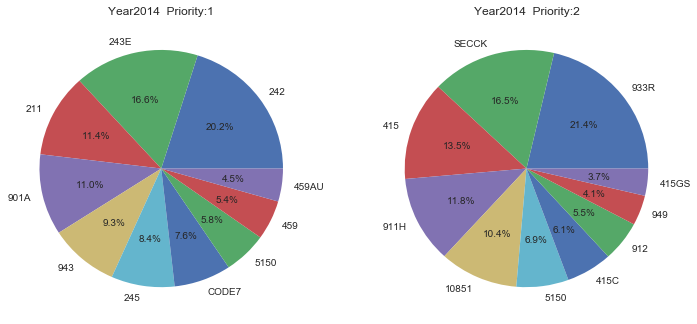

2015:的犯罪记录情况如下


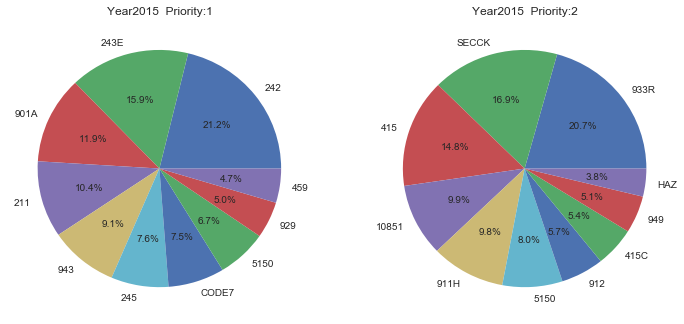

2016:的犯罪记录情况如下


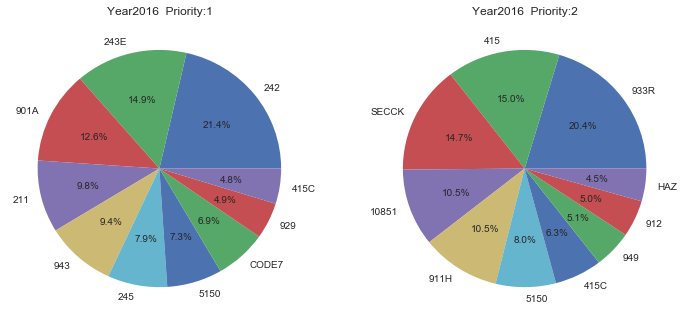

In [7]:
#按案件种类id，取频率top10分析，同样按照优先级1,2分类
print("无论是优先级1还是2，每年主要的犯罪类型所占比重基本不变，即Top10中各种犯罪类型占比稳定，不存在一种犯罪类型突然暴增或彻底消失的情况")
year=2011
for data in data_all:
    print(str(year)+":的犯罪记录情况如下")
    data_id=data[["Incident Type Id","Priority"]]
    data_id=data_id.dropna(axis=0,how='all')  
    data_p1=data_id[data_id["Priority"].isin([1])]
    data_p1=data_p1["Incident Type Id"].value_counts(sort=True)

    data_p2=data_id[data_id["Priority"].isin([2])]
    data_p2=data_p2["Incident Type Id"].value_counts(sort=True)

    data_p1=data_p1.head(10)
    crime_type1=data_p1.index.tolist()
    crime_num1=data_p1.values

    data_p2=data_p2.head(10)
    crime_type2=data_p2.index.tolist()
    crime_num2=data_p2.values


    plt.figure(figsize=(12,12))
    ax1 = plt.subplot(2,2,1)
    #第一行第二列图形
    ax2 = plt.subplot(2,2,2)

    plt.sca(ax1)
    plt.pie(crime_num1,labels=crime_type1,autopct='%1.1f%%')#绘制饼图
    plt.title("Year"+str(year)+"  Priority:1")
    plt.sca(ax2)
    plt.pie(crime_num2,labels=crime_type2,autopct='%1.1f%%')#绘制饼图
    plt.title("Year"+str(year)+"  Priority:2")
    plt.show()
    year+=1


In [73]:
#填充缺失值
#首先分析哪些属性有空值
year1=[2011,2012,2013,2014,2015,2016]

datatype1=[data1,data2,data3,data4,data5,data6]

count=0
for data in datatype1:
    data_add=data
    data_add=data_add.dropna(axis=0,how='all')#将某行全空的值剔除了，该值无意义
    data1_list=["Agency","Create Time","Area Id","Beat","Priority","Incident Type Id","Incident Type Description","Event Number","Closed Time"]
    print(str(year1[count])+"数据库有缺失的属性值有:")
    for data_list in data1_list:
        data_add_g=data_add[data_add[data_list].isnull()]
        if(len(data_add_g)>0):
            print(data_list)
    count+=1
print("由上可分析缺失的属性值主要为Area Id,Beat,Incident Type Description，Closed Time;")
print("根据数据库的描述应该分别为区号，巡逻点，犯罪种类描述，结案时间(?)")
print("由于这些属性不是单纯的数值属性，无法满足作业要求要求中的全部填充方法，可以完成的有剔除缺失值，利用属性间相关性进行填充")
print("其中的区号和巡逻点之间存在包含关系，一个区中包含多个巡逻点，Beat巡逻点的缺失未见逻辑性，推测为建库时漏掉了")
print("但Area 的的缺失和 Beat巡逻点有关，有的巡逻点划分在两个区域之间，这样的话不好划分区域，因此为空值，但基于随机划分是可以给该值进行填充")

2011数据库有缺失的属性值有:
Area Id
Beat
Closed Time
2012数据库有缺失的属性值有:
Area Id
Beat
Closed Time
2013数据库有缺失的属性值有:
Area Id
Beat
Incident Type Description
Closed Time
2014数据库有缺失的属性值有:
Area Id
Beat
Incident Type Description
2015数据库有缺失的属性值有:
Beat
Incident Type Description
2016数据库有缺失的属性值有:
Beat
由上可分析缺失的属性值主要为Area Id,Beat,Incident Type Description，Closed Time;
根据数据库的描述应该分别为区号，巡逻点，犯罪种类描述，结案时间(?)
由于这些属性不是单纯的数值属性，无法满足作业要求要求中的全部填充方法，可以完成的有剔除缺失值，利用属性间相关性进行填充
其中的区号和巡逻点之间存在包含关系，一个区中包含多个巡逻点，Beat巡逻点的缺失未见逻辑性，推测为建库时漏掉了
但Area 的的缺失和 Beat巡逻点有关，有的巡逻点划分在两个区域之间，这样的话不好划分区域，因此为空值，但基于随机划分是可以给该值进行填充


2011:的犯罪记录情况如下


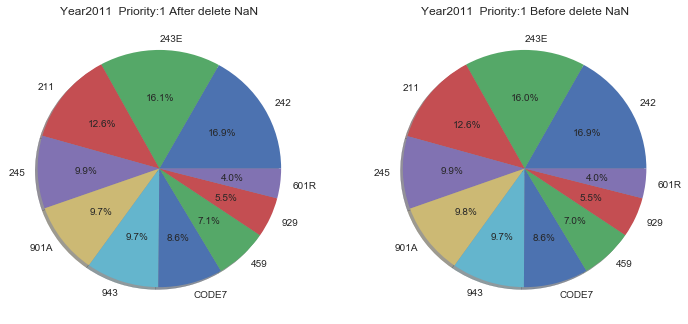

2012:的犯罪记录情况如下


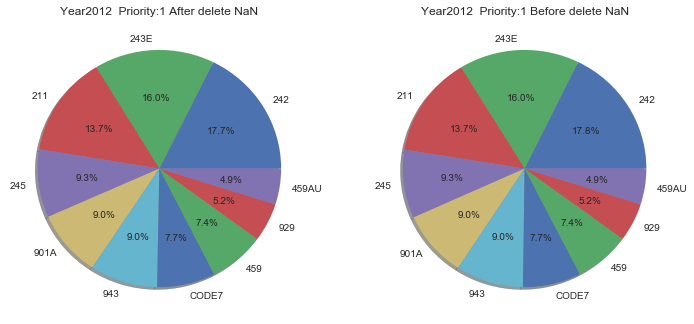

2013:的犯罪记录情况如下


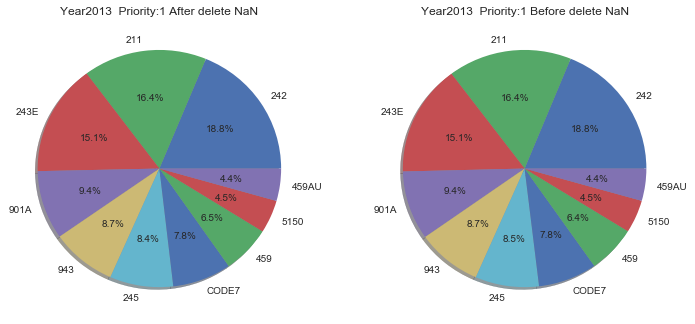

2014:的犯罪记录情况如下


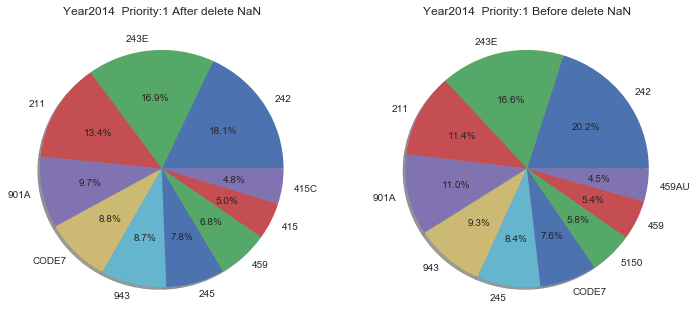

就犯罪种类前10占比中的优先级1而言其删除影响不大，每年导致的误差都大致在2%以内，其中绝大多数都在百分之零点几的范围内波动


In [74]:
#剔除空属性值
year=2011
for data in data_all:
    print(str(year)+":的犯罪记录情况如下")
    data_id=data[["Incident Type Id","Priority","Area Id","Beat","Incident Type Description","Closed Time"]]
    data_id=data_id.dropna(axis=0,how='any')   #剔除空属性值  
    data_id=data_id[["Incident Type Id","Priority"]]
    data_p1=data_id[data_id["Priority"].isin([1])]
    data_p1=data_p1["Incident Type Id"].value_counts(sort=True)
    
    data_id2=data[["Incident Type Id","Priority","Area Id","Beat","Incident Type Description","Closed Time"]]
    data_id2=data_id2.dropna(axis=0,how='all')   #剔除全空
    data_id2=data_id2[["Incident Type Id","Priority"]]
    data_p2=data_id2[data_id2["Priority"].isin([1])] 
    data_p2=data_p2["Incident Type Id"].value_counts(sort=True)

    data_p1=data_p1.head(10)
    crime_type1=data_p1.index.tolist()
    crime_num1=data_p1.values

    data_p2=data_p2.head(10)
    crime_type2=data_p2.index.tolist()
    crime_num2=data_p2.values


    plt.figure(figsize=(12,12))
    ax1 = plt.subplot(2,2,1)
    #第一行第二列图形
    ax2 = plt.subplot(2,2,2)

    plt.sca(ax1)
    plt.pie(crime_num1,labels=crime_type1,autopct='%1.1f%%',shadow="true")#绘制饼图
    plt.title("Year"+str(year)+"  Priority:1 After delete NaN")
    plt.sca(ax2)
    plt.pie(crime_num2,labels=crime_type2,autopct='%1.1f%%',shadow="true")#绘制饼图
    plt.title("Year"+str(year)+"  Priority:1 Before delete NaN")
    plt.show()
    year+=1
print("就犯罪种类前10占比中的优先级1而言其删除影响不大，每年导致的误差都大致在2%以内，其中绝大多数都在百分之零点几的范围内波动")

In [75]:
#根据属性间的相关关系填充1
#犯罪描述和犯罪类型有关，因此可以根据Incident Type Id来对Incident Type Description进行填充，需要填充的数据库为13,14,15
year=[2013,2014,2015]
data_Description=[data3,data4,data5]
for data in data_Description:
    data_D=data[["Incident Type Id","Incident Type Description"]]
    data_D=data_D.dropna(axis=0,how="all")
    data_DD=data_D[data_D.isnull().T.any()]
    print(str(year)+"年的缺失为")
    print(data_DD)


[2013, 2014, 2015]年的缺失为
       Incident Type Id Incident Type Description
178947              JGP                       NaN
185820              JGP                       NaN
186584              JGP                       NaN
187409              JGP                       NaN
[2013, 2014, 2015]年的缺失为
       Incident Type Id Incident Type Description
2382                JGP                       NaN
11137               JGP                       NaN
13174               JGP                       NaN
18605               JGP                       NaN
37673               JGP                       NaN
40821               JGP                       NaN
43486               JGP                       NaN
47107               JGP                       NaN
47920               JGP                       NaN
51931               JGP                       NaN
54692               JGP                       NaN
55455               JGP                       NaN
55504               JGP                       NaN
55

In [76]:
print("缺失的Incident Type Description主要为Incident Id：JGP，但这个Id类型在文中没有对其进行描述")
print("也就是说Incident Type Description的缺失是由一种Incident Id导致的，该种Id已经确定没有描述了，因此无法进行填充")

缺失的Incident Type Description主要为Incident Id：JGP，但这个Id类型在文中没有对其进行描述
也就是说Incident Type Description的缺失是由一种Incident Id导致的，该种Id已经确定没有描述了，因此无法进行填充


In [77]:
#关于Area Id和Beat之间的关系为Area Id包含Beat，因此可以从Beat中推出的Area Id的值，前提是该Beat在改列中出现过且Area Id不为空
year=[2011,2012,2013,2014,2015,2016]
count=0
data_Description=[data1,data2,data3,data4,data5,data6]
for data in data_Description:
    data_D=data[["Area Id","Beat"]]
    data_D=data_D.dropna(axis=0,how="all")
    data_DD=data_D[data_D.isnull().T.any()]
    print(str(year[count])+"年的缺失为")
    print(data_DD)
    count+=1

2011年的缺失为
        Area Id Beat
84          3.0  NaN
655         3.0  NaN
727         3.0  NaN
1187        NaN  24X
1933        NaN  32X
2118        3.0  NaN
3083        3.0  NaN
3277        1.0  NaN
3334        3.0  NaN
3965        1.0  NaN
4227        NaN  24X
4522        NaN  35X
4567        NaN  33X
4597        NaN  30X
4744        NaN  13Z
5465        3.0  NaN
5474        NaN  31Z
5487        NaN  35Y
5514        2.0  NaN
5821        3.0  NaN
6074        NaN  30Y
6121        NaN  26X
6542        NaN  35Y
6598        3.0  NaN
6781        1.0  NaN
6786        NaN  30Y
6847        NaN  02Y
6915        2.0  NaN
7044        NaN  30X
7177        1.0  NaN
...         ...  ...
174743      NaN  35X
174777      NaN  09X
174821      NaN  25X
175173      NaN  02Y
175310      1.0  NaN
175569      NaN  35Y
175666      NaN  27Y
175947      2.0  NaN
176035      1.0  NaN
176080      NaN  35Y
176087      NaN  30Y
176380      1.0  NaN
176437      1.0  NaN
176695      NaN  35X
177063      1.0  NaN
177

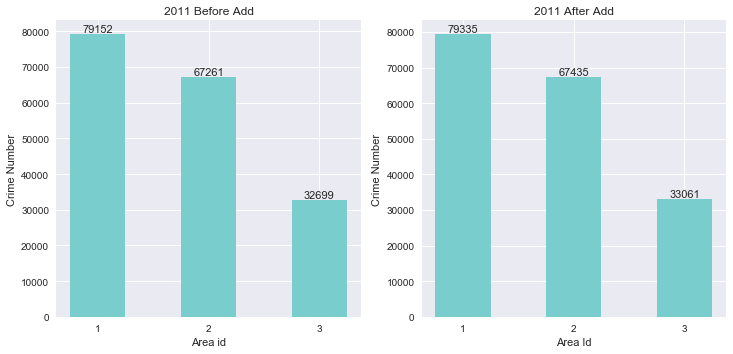

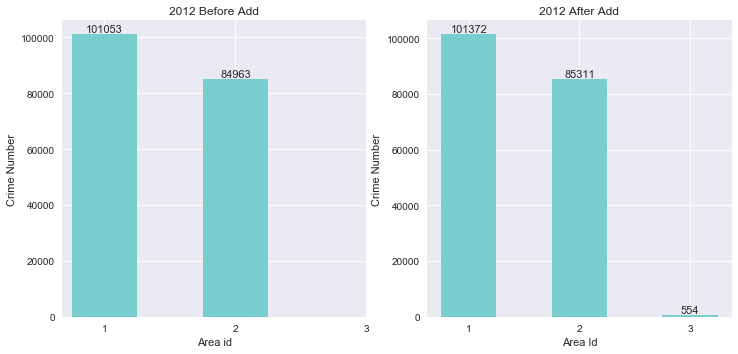

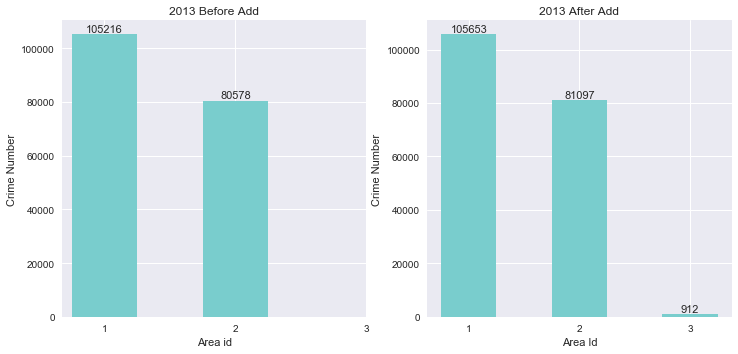

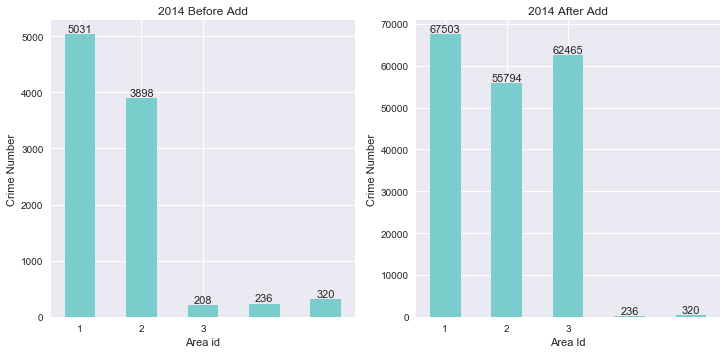

由统计直方图可以看出,11~13年的Area填充结果为锦上添花的效果，在原有缺失的基础上进行填充
2011~2013的数据库在填充后各个区域的案件数量所有增加，但总体占比未发生改变
值得注意的是，2014的年数据库缺失数据尤其的多，存在90%的空值未填充，因此填充后对于整体的影响较大，使数据库更为完整


In [80]:
#但实验进行到这发现一些问题，如11年记录去重以后的序号为93042和106837都是31Y，但编号分别为1,2，可以认定有的Beat巡逻区是位于两个Area之间的，
#因此值也不一定是一个，可以将包含该Beat的任一区域的值赋给Area id，作为一种属性填充的方法

#需要填充的数据库为2011~2014年4年的Area id
import math

year=2011
data_all=[data1,data2,data3,data4]
for data in data_all:
    data_D1=data[["Area Id","Beat"]]#原始数据
    data_D1=data_D1.dropna(axis=0,how="all")
    data_D1_values=data_D1.values
    data_D1_values_original=data_D1.values

    data_f=data1[["Area Id","Beat"]].dropna(axis=0,how="any")#数据字典
    data_f=data_f.drop_duplicates()
    data_f=data_f.drop_duplicates(subset=["Beat"])
    data_f=data_f.values

    for i in range(len(data_D1_values)):
        if(math.isnan(data_D1_values[i][0])):
            for x in data_f:
                if(data_D1_values[i][1]==x[1]and(~math.isnan(x[0]))):
                    data_D1_values[i][0]=x[0]
                    break;

    data_D1_values_original = pd.DataFrame(data_D1_values_original)#原始data
    d2_1=data_D1_values_original[0].value_counts(sort=True)
    
    area_id_original=d2_1.index.tolist()
    d2_1=d2_1.values
    index = np.arange(len(d2_1))

    data_D1_values_add = pd.DataFrame(data_D1_values)#填充后结果
    d2_2=data_D1_values_add[0].value_counts(sort=True)
    area_id_add=d2_2.index.tolist()
    d2_2=d2_2.values
    index = np.arange(len(d2_2))


    plt.figure(figsize=(12,12))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    plt.sca(ax1)
    plt.bar(area_id_original,d2_1, 0.5,color='#79CDCD')
    plt.xticks(area_id)
    for a,b in zip(area_id_original,d2_1):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Area id")  #设置X轴Y轴名称  
    plt.ylabel("Crime Number")  
    plt.title(str(year)+" Before Add")

    plt.sca(ax2)
    plt.bar(area_id_add,d2_2, 0.5,color='#79CDCD')
    plt.xticks(area_id)
    for a,b in zip(area_id_add,d2_2):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Area Id")  #设置X轴Y轴名称  
    plt.ylabel("Crime Number")  
    plt.title(str(year)+" After Add")
    plt.show()
    year=year+1
print("由统计直方图可以看出,11~13年的Area填充结果为锦上添花的效果，在原有缺失的基础上进行填充")
print("2011~2013的数据库在填充后各个区域的案件数量所有增加，但总体占比未发生改变")
print("值得注意的是，2014的年数据库缺失数据尤其的多，存在90%的空值未填充，因此填充后对于整体的影响较大，使数据库更为完整")